In [21]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [22]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [23]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 0.01
ypole = 0.002
zpole = -0.006

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [24]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [25]:
model = MultiDipoleModel(poles=1, lrate=0.0005, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=.0000000000002)
test_epochs = 500

In [26]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 2.1250029
epoch  1 --- Loss --- 0.57727396
epoch  2 --- Loss --- 0.14895895
epoch  3 --- Loss --- 0.033735733
epoch  4 --- Loss --- 0.006066227
epoch  5 --- Loss --- 0.0008167593
epoch  6 --- Loss --- 8.073305e-05
epoch  7 --- Loss --- 5.7413645e-06
epoch  8 --- Loss --- 2.8450765e-07
epoch  9 --- Loss --- 9.3270796e-09
epoch  10 --- Loss --- 1.8483234e-10
epoch  11 --- Loss --- 1.8268319e-12
epoch  12 --- Loss --- 1.2500375e-14


In [27]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 0.14832369089126587 minutes


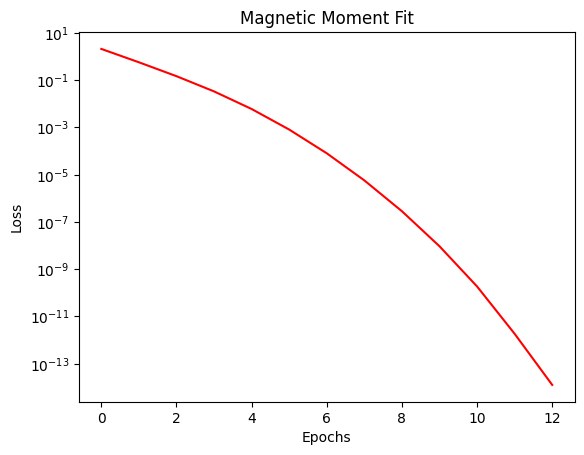

In [28]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [29]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.01   0.002 -0.006]]
Input
[[0.01, 0.002, -0.006]]


In [30]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.99998845160007
Percentage Accuracy Y-axis 99.99996032565832
Percentage Accuracy Z-axis 99.99996808667979
********************************
Average Accuracy:  99.9999722879794
